In [97]:
# libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import geopandas as gpd

In [98]:
#grabbing air quality data
airqual = gpd.read_file('USA_PM25_1998_to_2016_-6522946104901876862.zip')

In [99]:
airqual.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
airqual.columns

Index(['LOCATION', 'UNIQUEID', 'population', 'populati_1', 'populati_2',
       'raceandhis', 'wealth_pci', 'ownerrente', 'ownerren_1', 'ownerren_2',
       'ownerren_3', 'households', 'househol_1', 'househol_2', 'househol_3',
       'populati_3', 'populati_4', 'historical', 'housingcos', 'housingc_1',
       'housingc_2', 'housingc_3', 'homevalue_', 'TREND_Z', 'TREND_P',
       'TREND_BIN', 'CATEGORY', 'PATTERN', 'PERC_HOT', 'PERC_COLD',
       'TREND_Z_1', 'SUM_VALUE', 'MIN_VALUE', 'MAX_VALUE', 'MEAN_VALUE',
       'STD_VALUE', 'MED_VALUE', 'END_DATE1_', 'END_DATE11', 'END_DATE_1',
       'END_DATE_2', 'END_DATE_3', 'END_DATE_4', 'END_DATE_5', 'END_DATE_6',
       'END_DATE_7', 'END_DATE_8', 'END_DATE_9', 'END_DAT_10', 'END_DAT_11',
       'END_DAT_12', 'END_DAT_13', 'END_DAT_14', 'END_DAT_15', 'END_DAT_16',
       'END_DAT_17', 'GlobalID', 'geometry'],
      dtype='object')

In [101]:
airqual.head()

,LOCATION,UNIQUEID,population,populati_1,populati_2,raceandhis,wealth_pci,ownerrente,ownerren_1,ownerren_2,...,END_DAT_10,END_DAT_11,END_DAT_12,END_DAT_13,END_DAT_14,END_DAT_15,END_DAT_16,END_DAT_17,GlobalID,geometry
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,a4f77134-591e-4543-8aa0-dde96297c725,"POLYGON ((-7470829.538 2027617.612, -7474033.5..."
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.300000,1.350000,1.300000,1.300000,1.400000,1.100000,1.200000,1.200000,846413fc-edf5-45fd-ac07-1992a94d6fdb,"POLYGON ((-7399800.01 2024070.822, -7402997.06..."
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.180000,1.210000,1.200000,1.180000,1.260000,1.010000,1.190000,1.114286,3b3c7b83-b036-48b1-99ff-a751f795c9b9,"POLYGON ((-7361254.009 2027617.612, -7364449.2..."
3,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.416667,1.500000,1.433333,1.483333,1.666667,1.400000,1.400000,1.400000,80e0c91e-7e36-453a-8846-94b84899b449,"POLYGON ((-7479251.835 2031165.319, -7482457.8..."
4,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.457895,1.492105,1.471053,1.492105,1.655263,1.381579,1.484211,1.410811,32782a3a-d8b3-4aba-b91e-dba2af234be2,"POLYGON ((-7472020.374 2034713.944, -7475227.0..."


In [103]:
transit = gpd.read_file('2023 Agency Information_0.xlsx')
transit['Zip Code'].head()

0    98104.0
1    99201.0
2    98499.0
3    99155.0
4    98201.0
Name: Zip Code, dtype: float64

In [74]:
transit.head()

,State/Parent NTD ID,NTD ID,Legacy NTD ID,Agency Name,Division/Department,Reporter Acronym,Doing Business As,Reporter Type,Reporting Module,Organization Type,...,Sq Miles,VOMS DO,VOMS PT,Total VOMS,Volunteer Drivers,Personal Vehicles,TAM Tier,Number of State Counties,Number of Counties with Service,State Admin Funds Expended
0,None,1,1,King County,Metro Transit Department,KCM,King County Metro,Full Reporter,Urban,"City, County or Local Government Unit or Depar...",...,982.52,1814.0,456.0,2270,NaN,NaN,Tier I (Rail),NaN,NaN,NaN
1,None,2,2,Spokane Transit Authority,None,STA,None,Full Reporter,Urban,Independent Public Agency or Authority of Tran...,...,171.67,264.0,36.0,300,NaN,NaN,Tier I (Fixed Route VOMS),NaN,NaN,NaN
2,None,3,3,Pierce County Transportation Benefit Area Auth...,None,None,Pierce Transit,Full Reporter,Urban,Independent Public Agency or Authority of Tran...,...,982.52,368.0,62.0,430,NaN,NaN,Tier I (Fixed Route VOMS),NaN,NaN,NaN
3,None,4,0T04,Confederated Tribes of the Colville Indian Res...,None,None,None,Reduced Reporter,Tribe,Tribe,...,0.00,5.0,NaN,5,NaN,NaN,Tier II,NaN,NaN,NaN
4,None,5,5,City of Everett,None,ET,Everett Transit,Full Reporter,Urban,"City, County or Local Government Unit or Depar...",...,982.52,50.0,NaN,50,NaN,NaN,Tier II,NaN,NaN,NaN


In [96]:
#transit = transit.set_index('Zip')
transit.head()

,State/Parent NTD ID,NTD ID,Legacy NTD ID,Agency Name,Division/Department,Reporter Acronym,Doing Business As,Reporter Type,Reporting Module,Organization Type,...,Sq Miles,VOMS DO,VOMS PT,Total VOMS,Volunteer Drivers,Personal Vehicles,TAM Tier,Number of State Counties,Number of Counties with Service,State Admin Funds Expended
Zip Code,,,,,,,,,,,,,,,,,,,,,
98104.0,None,1,1,King County,Metro Transit Department,KCM,King County Metro,Full Reporter,Urban,"City, County or Local Government Unit or Depar...",...,982.52,1814.0,456.0,2270,NaN,NaN,Tier I (Rail),NaN,NaN,NaN
99201.0,None,2,2,Spokane Transit Authority,None,STA,None,Full Reporter,Urban,Independent Public Agency or Authority of Tran...,...,171.67,264.0,36.0,300,NaN,NaN,Tier I (Fixed Route VOMS),NaN,NaN,NaN
98499.0,None,3,3,Pierce County Transportation Benefit Area Auth...,None,None,Pierce Transit,Full Reporter,Urban,Independent Public Agency or Authority of Tran...,...,982.52,368.0,62.0,430,NaN,NaN,Tier I (Fixed Route VOMS),NaN,NaN,NaN
99155.0,None,4,0T04,Confederated Tribes of the Colville Indian Res...,None,None,None,Reduced Reporter,Tribe,Tribe,...,0.00,5.0,NaN,5,NaN,NaN,Tier II,NaN,NaN,NaN
98201.0,None,5,5,City of Everett,None,ET,Everett Transit,Full Reporter,Urban,"City, County or Local Government Unit or Depar...",...,982.52,50.0,NaN,50,NaN,NaN,Tier II,NaN,NaN,NaN


In [93]:
#tab join zip code to transit agencies, to do a spatial join with air quality dataframe
zip = gpd.read_file('tl_2022_us_zcta520.zip')

In [104]:
zip.head()
zip['Zip'] = zip['ZCTA5CE20'].astype('float64')
zip = zip.set_index('Zip')

In [105]:
transitGpd = zip.join(transit.set_index('Zip Code'))

In [106]:
transitGpd = transitGpd.to_crs('EPSG:3857')

In [107]:
transitGpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 34253 entries, 47236.0 to 37806.0
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ZCTA5CE20                        34253 non-null  object        
 1   GEOID20                          34253 non-null  object        
 2   CLASSFP20                        34253 non-null  object        
 3   MTFCC20                          34253 non-null  object        
 4   FUNCSTAT20                       34253 non-null  object        
 5   ALAND20                          34253 non-null  int64         
 6   AWATER20                         34253 non-null  int64         
 7   INTPTLAT20                       34253 non-null  object        
 8   INTPTLON20                       34253 non-null  object        
 9   geometry                         34253 non-null  geometry      
 10  State/Parent NTD ID              1641 non-null 

In [108]:
transitGpd = transitGpd.reset_index()
transit_airGpd = gpd.sjoin(transitGpd,airqual,predicate='intersects')

In [110]:
walkscore = pd.read_csv('Walk_Transit_Bike Score - Sheet1 (1).csv')

walkscore = walkscore[~(walkscore == '--').any(axis=1)]
walkscore.head()

,City,State,Walk Score,Transit Score,Bike Score,Population
0,New York,NY,88.0,88.6,69.3,"8,175,133"
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621"
2,Chicago,IL,77.2,65,72.2,"2,695,598"
3,Houston,TX,47.5,36.2,48.6,"2,099,451"
4,Philadelphia,PA,74.8,67,66.7,"1,526,006"


In [117]:
transit_airGpd = transit_airGpd[~(transit_airGpd == 'nan').any(axis=1)]
transit_airGpd.describe()

,Zip,ALAND20,AWATER20,FY End Date,Original Due Date,Zip Code Ext,Region,FTA Recipient ID,Service Area Sq Miles,Service Area Pop,...,END_DATE_8,END_DATE_9,END_DAT_10,END_DAT_11,END_DAT_12,END_DAT_13,END_DAT_14,END_DAT_15,END_DAT_16,END_DAT_17
count,366431.000000,3.664310e+05,3.664310e+05,51580,51580,43604.000000,51580.000000,46169.000000,10073.000000,1.007400e+04,...,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000,366431.000000
mean,60117.959234,1.191646e+09,3.180985e+07,2023-08-26 13:00:33.222000,2023-12-27 23:33:32.035000,4258.257775,6.837689,2480.135459,855.300705,2.901192e+05,...,8.162706,6.858807,6.671932,6.686491,7.106778,6.967816,7.310065,6.675157,7.693293,6.326153
min,601.000000,3.551000e+03,0.000000e+00,2023-02-28 00:00:00,2023-10-31 00:00:00,0.000000,1.000000,275.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39209.000000,1.325488e+08,3.596770e+05,2023-06-30 00:00:00,2023-10-31 00:00:00,2200.000000,5.000000,1168.000000,36.000000,5.047400e+04,...,5.858000,5.058333,4.851631,4.428571,4.554386,5.390323,5.311815,4.388976,5.728889,4.432651
50%,61525.000000,3.236200e+08,1.890796e+06,2023-06-30 00:00:00,2023-10-31 00:00:00,3549.000000,7.000000,1567.000000,78.000000,1.007160e+05,...,8.059091,6.921429,6.739216,6.705556,7.304000,6.983929,7.276667,6.814286,7.651064,6.392593
75%,81428.000000,8.284481e+08,8.457969e+06,2023-09-30 00:00:00,2024-01-31 00:00:00,5848.000000,9.000000,1815.000000,509.000000,2.233370e+05,...,10.720408,8.523660,8.334546,8.819608,9.307843,8.615686,8.820000,8.710638,9.441818,8.016981
max,99929.000000,3.542685e+10,3.695342e+09,2024-06-30 00:00:00,2024-10-31 00:00:00,9998.000000,10.000000,9033.000000,121697.000000,1.163811e+07,...,19.253333,18.435484,16.641176,16.152941,17.514286,16.158824,49.602740,17.276471,22.560377,22.671698
std,26405.123513,3.290035e+09,1.790563e+08,NaN,NaN,2526.347417,2.375079,2157.561201,4464.067314,8.025348e+05,...,3.125291,2.488237,2.256315,2.661821,2.979138,2.219290,3.318077,2.645731,2.908576,2.588266


In [118]:
transit_airGpd.City.unique()

array([nan, 'Peru', 'Lagrange', ..., 'Memphis', 'Martin', 'Murfreesboro'],
      dtype=object)

In [122]:
#join walkscore to transit_airGpd
transit_airGpd.head()
transit_air_walkGpd = transit_airGpd.set_index('City').join(walkscore.set_index('City'),rsuffix='_walk',how='inner')
#transit_air_walkGpd = transit_air_walkGpd.dropna()

In [123]:
transit_air_walkGpd

,Zip,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,...,END_DAT_14,END_DAT_15,END_DAT_16,END_DAT_17,GlobalID,State_walk,Walk Score,Transit Score,Bike Score,Population_walk
City,,,,,,,,,,,,,,,,,,,,,
Fort Wayne,46808.0,46808,46808,B5,G6350,S,27442493,192647,+41.0977501,-085.1771288,...,11.825000,12.012500,12.828571,10.633929,1a2f7540-2f5c-4743-9a0d-424d5766cb99,IN,31.7,21.7,41.0,"253,691"
Fort Wayne,46808.0,46808,46808,B5,G6350,S,27442493,192647,+41.0977501,-085.1771288,...,11.677778,11.901852,12.298148,10.472222,f9c665ff-d2cd-4625-9d4c-b564fa91a6f6,IN,31.7,21.7,41.0,"253,691"
Fort Wayne,46808.0,46808,46808,B5,G6350,S,27442493,192647,+41.0977501,-085.1771288,...,12.007407,12.370370,13.494444,10.855556,5c83038e-951e-4a63-b962-97aeb4a84d59,IN,31.7,21.7,41.0,"253,691"
Columbus,47201.0,47201,47201,B5,G6350,S,521162335,5548759,+39.1482208,-085.9994073,...,10.456604,11.001887,12.381132,9.792453,0e6e441d-1aed-4c6b-995a-64ca4cf21b0f,OH,41.2,30.2,47.7,"787,033"
Columbus,47201.0,47201,47201,B5,G6350,S,521162335,5548759,+39.1482208,-085.9994073,...,9.411321,10.037736,11.056604,8.779245,93697ad9-5a97-4973-bdab-599062aa2baf,OH,41.2,30.2,47.7,"787,033"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Madison,37115.0,37115,37115,B5,G6350,S,55574343,1697375,+36.2552788,-086.6986667,...,8.651923,9.188461,9.255769,8.053846,48f3f7d4-46a0-4369-8215-e9f89af320b6,WI,49.7,34.9,65.5,"233,209"
Madison,37115.0,37115,37115,B5,G6350,S,55574343,1697375,+36.2552788,-086.6986667,...,9.338298,9.831915,10.063830,8.691489,81dc3fc5-e6ce-4600-aee5-016f60adb320,WI,49.7,34.9,65.5,"233,209"
Memphis,38108.0,38108,38108,B5,G6350,S,19672509,1653874,+35.1768997,-089.9639740,...,10.396154,11.063462,11.757692,8.701923,79cd3b8e-3974-49d6-9982-e59e762b0301,TN,35.0,22.2,41.2,"646,889"


In [125]:
transit_air_walkGpd = transit_air_walkGpd.reset_index()
transit_air_walkGpd = transit_air_walkGpd.sort_values('MEAN_VALUE',ascending=True)

In [126]:
transit_air_walkGpd = transit_air_walkGpd.drop_duplicates(subset=['Zip'],keep='first')

In [127]:
to_cluster = transit_air_walkGpd[['Walk Score','Transit Score','Bike Score','MEAN_VALUE','Total VOMS']]

scaler = preprocessing.StandardScaler().fit(to_cluster)
                   
df_to_cluster = pd.DataFrame(scaler.transform(to_cluster), 
                         columns=to_cluster.columns, index=transit_air_walkGpd.index)
kmeans = KMeans(n_clusters=5, random_state=1).fit(df_to_cluster)
print(kmeans)
df_to_cluster['cluster_id'] = kmeans.labels_
print(df_to_cluster.groupby('cluster_id').size())

KMeans(n_clusters=5, random_state=1)
cluster_id
0    67
1    42
2     8
3    42
4    51
dtype: int64


In [128]:
df_to_cluster.head()

,Walk Score,Transit Score,Bike Score,MEAN_VALUE,Total VOMS,cluster_id
1762,1.606363,1.674375,1.382454,-3.320695,-0.391348,1
252,0.899507,1.108695,-0.210044,-2.997560,1.305314,1
870,-1.239500,-1.147522,-0.149949,-2.577617,0.053192,0
1151,-0.557231,-0.243735,-0.548074,-2.189605,-0.383939,0
808,0.954826,0.536513,0.676347,-2.162312,-0.381470,1


In [129]:
#cluster_join = walkscore.join(df_to_cluster,)
cluster_join = pd.merge(walkscore, df_to_cluster['cluster_id'], left_index=True, right_index=True)

In [130]:
cluster_join.head()

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621",3
22,Seattle,WA,74.4,59.6,71.1,"608,660",3
24,Nashville-Davidson,TN,28.8,21.7,29.7,"601,222",3
33,Fresno,CA,46.6,33.1,58.1,"494,665",3
37,Mesa,AZ,37.9,27,59.6,"439,041",3


In [131]:
cluster_join[cluster_join['cluster_id'] == 0]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id


In [132]:
cluster_join[cluster_join['cluster_id'] == 1]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id


In [133]:
cluster_join[cluster_join['cluster_id'] == 2]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id


In [134]:
cluster_join[cluster_join['cluster_id'] == 3]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621",3
22,Seattle,WA,74.4,59.6,71.1,"608,660",3
24,Nashville-Davidson,TN,28.8,21.7,29.7,"601,222",3
33,Fresno,CA,46.6,33.1,58.1,"494,665",3
37,Mesa,AZ,37.9,27,59.6,"439,041",3
49,Arlington,TX,38.1,0.3,39.5,"365,438",3


In [135]:
cluster_join[cluster_join['cluster_id'] == 4]

,City,State,Walk Score,Transit Score,Bike Score,Population,cluster_id
76,Chula Vista,CA,45.6,35.4,41.2,"243,916",4


In [136]:
# code from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def radar_plot(kmeans, df_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in df_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

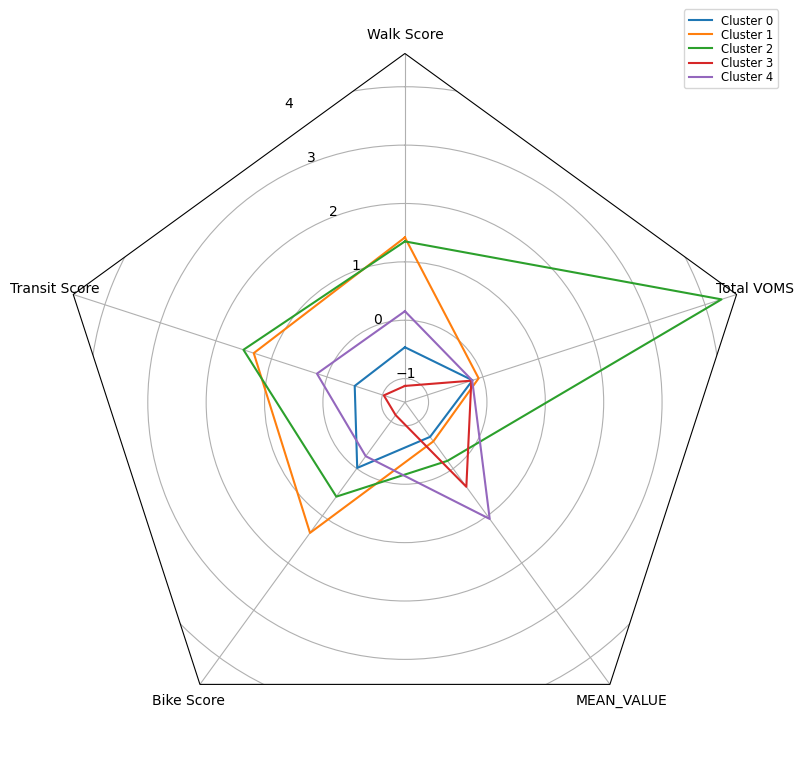

In [137]:
# radar plot (only run this at the end)
df_to_cluster.drop(columns=['cluster_id'], inplace=True) 
radar_plot(kmeans, df_to_cluster)